<a href="https://colab.research.google.com/github/Itsparathox/AutoEncoders/blob/master/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
(X_train,y_train),(X_test, y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.losses import KLDivergence
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Input
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Model

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [5]:
encoder_input = Input(shape=(28, 28, 1))
x = Conv2D(32, (3,3), activation="relu", padding='same')(encoder_input)
x = MaxPooling2D()(x)
x = Conv2D(16, (3,3), activation="relu", padding='same')(x)
x = MaxPooling2D()(x)
#x = Conv2D(32, 3, activation="relu")(x)
#x = Conv2D(16, 3, activation="relu")(x)
#x = Flatten()(x)
#encoder_output = Dense(16, activation="relu")(x)

In [6]:
shape = x.shape

In [7]:
x = Flatten()(x)
encoder_output = Dense(16, activation="relu")(x)

In [8]:
encoder = Model(encoder_input,encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                1256

In [9]:
decoder_input = Input(shape=(16,))
x = Dense(shape[1]*shape[2]*shape[3])(decoder_input)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(16, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(x)
# x = Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = Conv2DTranspose(1, 3, activation="sigmoid", padding='same')(x)

In [10]:
decoder_output.shape

TensorShape([None, 28, 28, 1])

In [11]:
decoder = Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               13328     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 16)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        4640

In [12]:
autoencoder_input = Input(shape=(28, 28, 1))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                17504     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         20577     
Total params: 38,081
Trainable params: 38,081
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(loss = 'mse', optimizer = 'Adam', metrics=["accuracy"])

In [14]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [15]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [16]:
autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0257 - accuracy: 0.8077 - val_loss: 0.0164 - val_accuracy: 0.8100
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0155 - accuracy: 0.8112 - val_loss: 0.0141 - val_accuracy: 0.8108
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0139 - accuracy: 0.8120 - val_loss: 0.0133 - val_accuracy: 0.8110
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0131 - accuracy: 0.8124 - val_loss: 0.0126 - val_accuracy: 0.8115
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0126 - accuracy: 0.8126 - val_loss: 0.0124 - val_accuracy: 0.8121


In [17]:
x_decoded = autoencoder.predict(X_test)

In [18]:
print(x_decoded.shape)

(10000, 28, 28, 1)


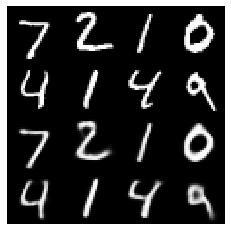

In [19]:
imgs = np.concatenate([X_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, 28, 28))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.imshow(imgs, interpolation = 'none', cmap = 'gray')
plt.savefig('input_and_decoded.png')
plt.show()